In [3]:
!ls

Airline_data_analysis.ipynb          Visualizing_data.ipynb
Airline_data_analysis_2.ipynb        add_for_long_lat.csv
RF_DEP_DELAY.ipynb                   helper
Regression_DEP_delay_Arr_Delay.ipynb


This is exploratory data from Bureau of Transport Statistics. I download, clean and analyze this data. 
Explanations of the columns can be found in https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On%20Time. I am interested in Departure delay of the flights.
#### Data file 
airline.csv

In [4]:
# Import stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from helper.imports import *
from helper.structured  import *
%matplotlib inline

/Applications/anaconda3/envs/DNN/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#Data path
path_data = '/Users/franciumpnc/Documents/ML/AQM/ML_practice_projects/Airline_data_analysis/data/original/jan_2020_airline_data.csv'

In [4]:
!head /Users/franciumpnc/Documents/ML/AQM/ML_practice_projects/Airline_data_analysis/data/original/jan_2020_airline_data.csv

"FL_DATE","OP_UNIQUE_CARRIER","ORIGIN_AIRPORT_ID","ORIGIN_AIRPORT_SEQ_ID","ORIGIN_CITY_MARKET_ID","ORIGIN","ORIGIN_CITY_NAME","ORIGIN_STATE_ABR","ORIGIN_STATE_FIPS","ORIGIN_STATE_NM","DEST_AIRPORT_ID","CRS_DEP_TIME","DEP_TIME","DEP_DELAY","ARR_DELAY","CANCELLED","FLIGHTS","DISTANCE","CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY","FIRST_DEP_TIME",
2020-01-01,"WN",13891,1389101,32575,"ONT","Ontario, CA","CA","06","California",14771,"1810","1851",41.00,68.00,0.00,1.00,363.00,8.00,0.00,27.00,0.00,33.00,"",
2020-01-01,"WN",13891,1389101,32575,"ONT","Ontario, CA","CA","06","California",14771,"1150","1146",-4.00,-2.00,0.00,1.00,363.00,,,,,,"",
2020-01-01,"WN",13891,1389101,32575,"ONT","Ontario, CA","CA","06","California",14831,"2020","2016",-4.00,-6.00,0.00,1.00,333.00,,,,,,"",
2020-01-01,"WN",13891,1389101,32575,"ONT","Ontario, CA","CA","06","California",14831,"1340","1350",10.00,10.00,0.00,1.00,333.00,,,,,,"",
2020-01-01,"WN",13891,1389101,32575,"ONT","On

In [5]:
!wc -l /Users/franciumpnc/Documents/ML/AQM/ML_practice_projects/airline_data/jan_2020_airline_data.csv

  607347 /Users/franciumpnc/Documents/ML/AQM/ML_practice_projects/airline_data/jan_2020_airline_data.csv


In [6]:
df = pd.read_csv(path_data,parse_dates =['FL_DATE'],infer_datetime_format = True)

In [7]:
def display_all(df):
    with pd.option_context("display.max_rows",1000,"display.max_columns",1000):
        display(df)

In [8]:
display_all(df.tail().T)

,607341,607342,607343,607344,607345
FL_DATE,2020-01-31 00:00:00,2020-01-31 00:00:00,2020-01-31 00:00:00,2020-01-31 00:00:00,2020-01-31 00:00:00
OP_UNIQUE_CARRIER,9E,9E,9E,9E,9E
ORIGIN_AIRPORT_ID,11278,11278,12478,13930,12953
ORIGIN_AIRPORT_SEQ_ID,1127805,1127805,1247805,1393007,1295304
ORIGIN_CITY_MARKET_ID,30852,30852,31703,30977,31703
ORIGIN,DCA,DCA,JFK,ORD,LGA
ORIGIN_CITY_NAME,"Washington, DC","Washington, DC","New York, NY","Chicago, IL","New York, NY"
ORIGIN_STATE_ABR,VA,VA,NY,IL,NY
ORIGIN_STATE_FIPS,51,51,36,17,36
ORIGIN_STATE_NM,Virginia,Virginia,New York,Illinois,New York


In [9]:
df.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'FLIGHTS', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'Unnamed: 24'],
      dtype='object')

In [10]:
#Time sensitive data, sort by FL_DATE
data = df[['FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'FLIGHTS', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME']]
data=data.sort_values('FL_DATE')
data.head()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,...,ARR_DELAY,CANCELLED,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME
0,2020-01-01,WN,13891,1389101,32575,ONT,"Ontario, CA",CA,6,California,...,68.0,0.0,1.0,363.0,8.0,0.0,27.0,0.0,33.0,NaN
12067,2020-01-01,WN,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,...,-17.0,0.0,1.0,896.0,NaN,NaN,NaN,NaN,NaN,NaN
12068,2020-01-01,WN,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,...,-20.0,0.0,1.0,896.0,NaN,NaN,NaN,NaN,NaN,NaN
12069,2020-01-01,WN,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,...,-21.0,0.0,1.0,896.0,NaN,NaN,NaN,NaN,NaN,NaN
12070,2020-01-01,WN,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,...,-13.0,0.0,1.0,1243.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
display_all(data.describe(include ='all').T)

/Applications/anaconda3/envs/DNN/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
FL_DATE,607346,31,2020-01-06 00:00:00,20943,2020-01-01,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_UNIQUE_CARRIER,607346,17,WN,109770,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN_AIRPORT_ID,607346,NaN,NaN,NaN,NaT,NaT,12657.4,1524.41,10135,11292,12889,14027,16869
ORIGIN_AIRPORT_SEQ_ID,607346,NaN,NaN,NaN,NaT,NaT,1.26574e+06,152440,1.01351e+06,1.1292e+06,1.2889e+06,1.4027e+06,1.6869e+06
ORIGIN_CITY_MARKET_ID,607346,NaN,NaN,NaN,NaT,NaT,31761.3,1308.05,30070,30713,31453,32467,35991
ORIGIN,607346,351,ATL,32190,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN_CITY_NAME,607346,344,"Atlanta, GA",32190,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN_STATE_ABR,607346,52,CA,66748,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN_STATE_FIPS,607346,NaN,NaN,NaN,NaT,NaT,26.876,16.5603,1,12,26,42,78
ORIGIN_STATE_NM,607346,52,California,66748,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
add_datepart(data,'FL_DATE')

/Users/franciumpnc/Documents/ML/AQM/ML_practice_projects/Airline_data_analysis/notebooks/helper/structured.py:123: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())


In [92]:
?? add_datepart

In [13]:
data.head()

,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,DEST_AIRPORT_ID,...,FL_DATEDay,FL_DATEDayofweek,FL_DATEDayofyear,FL_DATEIs_month_end,FL_DATEIs_month_start,FL_DATEIs_quarter_end,FL_DATEIs_quarter_start,FL_DATEIs_year_end,FL_DATEIs_year_start,FL_DATEElapsed
0,WN,13891,1389101,32575,ONT,"Ontario, CA",CA,6,California,14771,...,1,2,1,False,True,False,True,False,True,1577836800
12067,WN,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,11292,...,1,2,1,False,True,False,True,False,True,1577836800
12068,WN,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,11292,...,1,2,1,False,True,False,True,False,True,1577836800
12069,WN,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,11292,...,1,2,1,False,True,False,True,False,True,1577836800
12070,WN,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,11697,...,1,2,1,False,True,False,True,False,True,1577836800


#### Investigate DEP Delay.
Take only those rows where DEP_DELAY delay is reported and Find out, if there is any null values

In [14]:
data.DEP_DELAY.isnull().sum()

6699

Take only those rows where DEP_DELAY is reported.

In [15]:
data = data[data['DEP_DELAY'].notna()]
print("Rows of data ", len(data))

Rows of data  600647


#### Add a new column where Dep_delay is positive. Flights on time and early departures are reported as 0 and negative numbers

In [16]:
data.insert(1,"DEP_DELAY2",data["DEP_DELAY"])

In [17]:
data.head()

,OP_UNIQUE_CARRIER,DEP_DELAY2,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,...,FL_DATEDay,FL_DATEDayofweek,FL_DATEDayofyear,FL_DATEIs_month_end,FL_DATEIs_month_start,FL_DATEIs_quarter_end,FL_DATEIs_quarter_start,FL_DATEIs_year_end,FL_DATEIs_year_start,FL_DATEElapsed
0,WN,41.0,13891,1389101,32575,ONT,"Ontario, CA",CA,6,California,...,1,2,1,False,True,False,True,False,True,1577836800
12067,WN,1.0,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,...,1,2,1,False,True,False,True,False,True,1577836800
12068,WN,-4.0,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,...,1,2,1,False,True,False,True,False,True,1577836800
12069,WN,-5.0,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,...,1,2,1,False,True,False,True,False,True,1577836800
12070,WN,0.0,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,...,1,2,1,False,True,False,True,False,True,1577836800


In [18]:
data1=data.loc[data.DEP_DELAY2<0]
data2=data.loc[data.DEP_DELAY2>=0]
data1["DEP_DELAY2"]=0
dataf = data1
dataf = dataf.append(data2)
del data1
del data2
dataf=dataf.sort_index()

/Applications/anaconda3/envs/DNN/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Find fraction of flights that were on time. This assumes DEP_delay is reported on these flights

In [19]:
a=100*len(dataf[dataf['DEP_DELAY']==0])/len(dataf)
b=100*len(dataf[dataf['DEP_DELAY']<0])/len(dataf)
c=100*len(dataf[dataf['DEP_DELAY']>0])/len(dataf)
print("percentage of flights on time" ,a)
print("percentage of early departure" ,b)
print("percentage of flights delayed" ,c)

percentage of flights on time 5.013427187682615
percentage of early departure 67.1009761140903
percentage of flights delayed 27.88559669822708


In [20]:
a1=100*len(dataf[dataf['DEP_DELAY2']==0])/len(dataf)
b1=100*len(dataf[dataf['DEP_DELAY2']<0])/len(dataf)
c1=100*len(dataf[dataf['DEP_DELAY2']>0])/len(dataf)
print("percentage of flights on time" ,a1)
print("percentage of early departure" ,b1)
print("percentage of flights delayed" ,c1)

percentage of flights on time 72.11440330177292
percentage of early departure 0.0
percentage of flights delayed 27.88559669822708


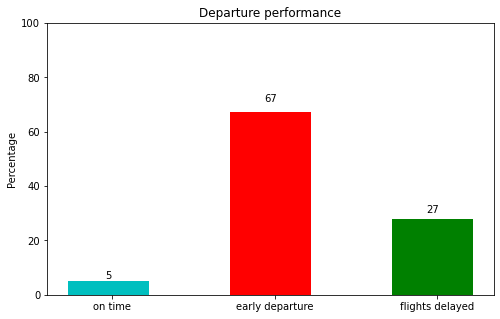

In [21]:
y1=[a,b,c]
x1=range(len(y1))
my_colors = ['c','r','g','c']
fig, ax = plt.subplots(figsize=(8,5))
width=0.5
rects1 = ax.bar(x1, y1, width=0.5, color=my_colors)
ax.set_ylim(0,100)
ax.set_ylabel('Percentage')
ax.set_title('Departure performance')
ax.set_xticks(np.add(x1,(width)/20)) # set the position of the x ticks
ax.set_xticklabels(('on time', 'early departure', 'flights delayed'))
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
plt.show()

<AxesSubplot:>

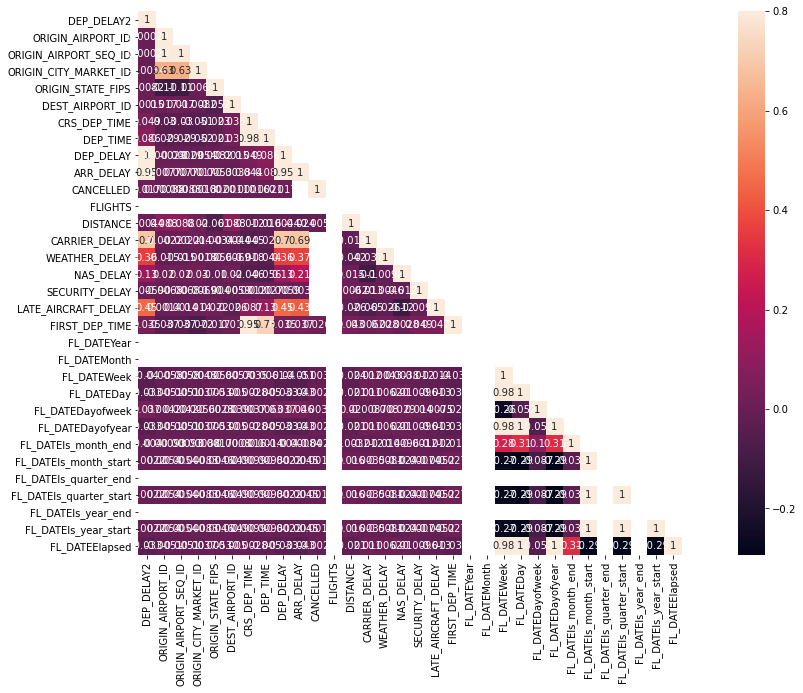

In [22]:
from string import ascii_letters
import seaborn as sns
corr = data.corr()
# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
#Correlation matrix
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

In [23]:
b=dataf.DEP_DELAY[dataf.DEP_DELAY<0]

<AxesSubplot:>

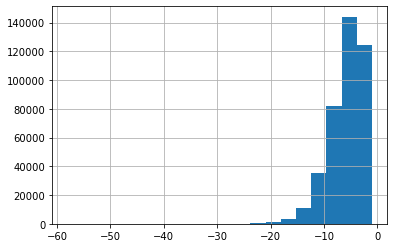

In [24]:
b.hist(bins=20)

Take only those rows where departure delay is 500 or less

In [25]:
dataf = dataf[data['DEP_DELAY']<=500]

/Applications/anaconda3/envs/DNN/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


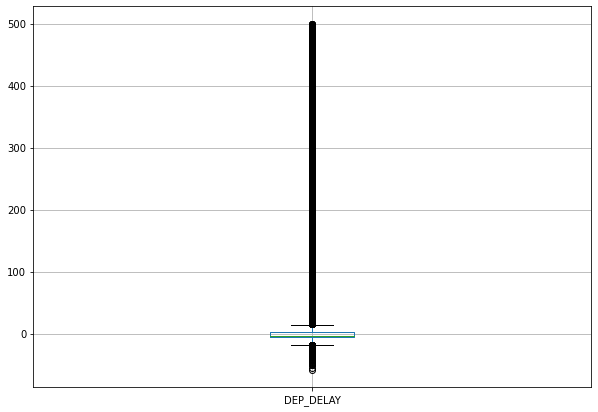

In [26]:
boxplot = dataf.boxplot(column=['DEP_DELAY'],figsize = (10,7))

Assuming flight time is about the same, we can expact Arrival and Departure delay are correlated. So, we can do a linear regression on that data. 

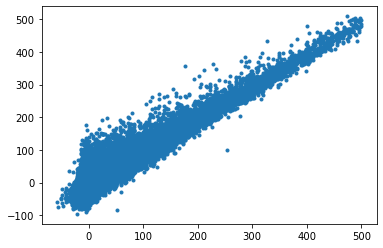

In [27]:
plt.plot(dataf['DEP_DELAY'],dataf['ARR_DELAY'],'.')

In [28]:
from sklearn.linear_model import LinearRegression 
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [29]:
#Fill None in ARR_DELAY with corresponding DEP_DELAY values
dataf['ARR_DELAY'].fillna(dataf['DEP_DELAY'],inplace = True)
y = dataf['ARR_DELAY'].values.reshape(len(dataf),1)
X = dataf['DEP_DELAY'].values.reshape(len(dataf),1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [31]:
# The coefficients
print('Coefficients:', reg.coef_,' Intercept ',reg.intercept_)
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Coefficients: [[1.00353]]  Intercept  [-7.73982]
Mean squared error: 182.62
Coefficient of determination: 0.85


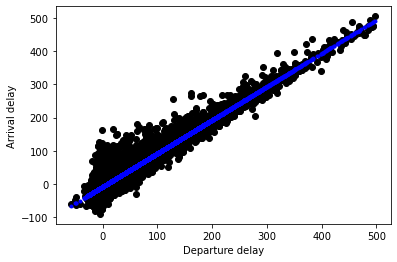

In [32]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred,'.', color='blue', linewidth=3)
plt.xlabel('Departure delay')
plt.ylabel('Arrival delay')
plt.show()

In terms of hypothesis testing. We are assuming the model is $Y = \beta_0+ \beta_1+\epsilon$

$\text{NULL hypothesis is } H_0: \text{There is no relation between Dep_delay and Arr_delay}$

$\text{Alternative hypothesis is } H_a: \text{There is some relation between Dep_delay and Arr_delay}$

Mathematically, this corresponds to testing

$H_0 : \beta _1 = 0$

Versus

$H_a : \beta _1 \neq 0$






In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [34]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 2.615e+06
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:52:46   Log-Likelihood:            -1.9307e+06
No. Observations:              479934   AIC:                         3.861e+06
Df Residuals:                  479932   BIC:                         3.861e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7398      0.020   -391.396      0.0

sklearn does not include error estimates for fitted parameters. statsmodel shows the std error and also reports the p value. Here we see that the p value is 0 upto three digits. This means that the observed relation (namely parameter x1 is not zero) between Dep_delay and Arr_delay predicted by our model is very unlikely due to chance in absence of any real association. This small p value indicates there is a relation between these. So we reject the null hypothesis and coclude that there is a relation between these two parameters.   

#### Lets look at the latitude and longitude of the airports so that we can plot them in a map.


In [35]:
!ls

Airline_data_analysis.ipynb   add_for_long_lat.csv
Airline_data_analysis_2.ipynb helper


In [36]:
#Get the origin airport. Here the code is ORIGIN_AIRPORT_SEQ_ID.
df_origin = pd.read_csv("/Users/franciumpnc/Documents/ML/AQM/ML_practice_projects/Airline_data_analysis/data/original/origin_ap_code.csv")

In [37]:
df_origin.head()

,Code,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"
3,10005,"Little Squaw, AK: Little Squaw Airport"
4,10006,"Kizhuyak, AK: Kizhuyak Bay"


In [38]:
#Rename the Code column to ORIGIN_AIRPORT_SEQ_ID
df_origin = df_origin.rename(index =str, columns={"Code":"ORIGIN_AIRPORT_ID"})

In [39]:
#Find the number of unique airports in the data
len(data.ORIGIN_AIRPORT_ID.unique())

351

In [40]:
#Find the busiest airport over the month
count_origin = dataf.groupby('ORIGIN').size()
print ("Busiest airport in terms of origin:", count_origin.idxmax(), ', with flights:',count_origin.max())

Busiest airport in terms of origin: ATL , with flights: 32063


In [41]:
count_origin.head()

ORIGIN
ABE     359
ABI     163
ABQ    1826
ABR      60
ABY      84
dtype: int64

In [42]:
#Find the busiest airline over the month
count_airline = dataf.groupby('OP_UNIQUE_CARRIER').size()
print ("Busiest airline in terms of # of flights:", count_airline.idxmax(), ', with flights:',count_airline.max())

Busiest airline in terms of # of flights: WN , with flights: 107878


In [43]:
dataf.columns

Index(['OP_UNIQUE_CARRIER', 'DEP_DELAY2', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'FLIGHTS', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'FL_DATEYear', 'FL_DATEMonth',
       'FL_DATEWeek', 'FL_DATEDay', 'FL_DATEDayofweek', 'FL_DATEDayofyear',
       'FL_DATEIs_month_end', 'FL_DATEIs_month_start', 'FL_DATEIs_quarter_end',
       'FL_DATEIs_quarter_start', 'FL_DATEIs_year_end', 'FL_DATEIs_year_start',
       'FL_DATEElapsed'],
      dtype='object')

In [44]:
df_origin.head()

,ORIGIN_AIRPORT_ID,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"
3,10005,"Little Squaw, AK: Little Squaw Airport"
4,10006,"Kizhuyak, AK: Kizhuyak Bay"


In [45]:
#Merge the df_origin with data on ORIGIN_AIRPORT_ID
%time data_full=pd.merge(dataf,df_origin, how ='left', on=['ORIGIN_AIRPORT_ID'])

CPU times: user 350 ms, sys: 117 ms, total: 467 ms
Wall time: 477 ms


In [46]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599918 entries, 0 to 599917
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   OP_UNIQUE_CARRIER        599918 non-null  object 
 1   DEP_DELAY2               599918 non-null  float64
 2   ORIGIN_AIRPORT_ID        599918 non-null  int64  
 3   ORIGIN_AIRPORT_SEQ_ID    599918 non-null  int64  
 4   ORIGIN_CITY_MARKET_ID    599918 non-null  int64  
 5   ORIGIN                   599918 non-null  object 
 6   ORIGIN_CITY_NAME         599918 non-null  object 
 7   ORIGIN_STATE_ABR         599918 non-null  object 
 8   ORIGIN_STATE_FIPS        599918 non-null  int64  
 9   ORIGIN_STATE_NM          599918 non-null  object 
 10  DEST_AIRPORT_ID          599918 non-null  int64  
 11  CRS_DEP_TIME             599918 non-null  int64  
 12  DEP_TIME                 599918 non-null  float64
 13  DEP_DELAY                599918 non-null  float64
 14  ARR_

In [47]:
#save the ORIGIN_AIRPORT_ID and description so that we can use it in google to get the lattitude and 
#longitudes.
import csv
long_lat_frm_add = data_full[['ORIGIN_AIRPORT_ID','Description']].copy()
long_lat_frm_add = long_lat_frm_add.drop_duplicates()
long_lat_frm_add = long_lat_frm_add.rename(index =str, columns={"Description":"Address"})
long_lat_frm_add.to_csv('/Users/franciumpnc/Documents/ML/AQM/ML_practice_projects/Airline_data_analysis/data/original/add_for_long_lat.csv')

In [48]:
long_lat_frm_add.head()

,ORIGIN_AIRPORT_ID,Address
0,13891,"Ontario, CA: Ontario International"
14,13931,"Norfolk, VA: Norfolk International"
20,14027,"West Palm Beach/Palm Beach, FL: Palm Beach Int..."
26,14057,"Portland, OR: Portland International"
58,14100,"Philadelphia, PA: Philadelphia International"


In [57]:
pos=pd.read_csv('/Users/franciumpnc/Documents/ML/AQM/ML_practice_projects/Airline_data_analysis/data/original/long_lat1.csv')

In [58]:
pos.head()

,Unnamed: 0,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,input_string,number_of_results,status
0,0,"Ontario International Airport (ONT), Ontario, ...",34.055978,-117.598057,GEOMETRIC_CENTER,ChIJp9TPWvw0w4ARO1JZyBbtxJ8,"airport,establishment,point_of_interest",91761.0,"Ontario, CA: Ontario International",1,OK
1,1,"Norfolk International Airport (ORF), 2200 Norv...",36.895684,-76.200016,ROOFTOP,ChIJOd96j8OWuokR5l3A1KtPtKg,"airport,establishment,point_of_interest",23518.0,"Norfolk, VA: Norfolk International",2,OK
2,2,"Palm Beach International Airport (PBI), 1000 J...",26.685747,-80.092816,ROOFTOP,ChIJQVRfVivW2IgRvnZRhc5s4N8,"airport,establishment,point_of_interest",33415.0,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",1,OK
3,3,"1940 N Victory Blvd, Portland, OR 97217, USA",45.593085,-122.688131,ROOFTOP,ChIJG0Zh9dKnlVQRhamn45i9bVs,"establishment,point_of_interest",97217.0,"Portland, OR: Portland International",1,OK
4,4,"Philadelphia International Airport (PHL), 8000...",39.874396,-75.242423,ROOFTOP,ChIJL4OpYGbExokR2NM3RpQVLj4,"airport,establishment,point_of_interest",19153.0,"Philadelphia, PA: Philadelphia International",1,OK


The pos dataframe does not contain ORIGIN_airport_id. We need this to map the rows.

In [59]:
pos=pos.rename(index =str, columns={"input_string":"Address"})

In [60]:
positions = pd.merge(pos,long_lat_frm_add,how ='left',on=['Address'])

In [61]:
positions.head()

,Unnamed: 0,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,Address,number_of_results,status,ORIGIN_AIRPORT_ID
0,0,"Ontario International Airport (ONT), Ontario, ...",34.055978,-117.598057,GEOMETRIC_CENTER,ChIJp9TPWvw0w4ARO1JZyBbtxJ8,"airport,establishment,point_of_interest",91761.0,"Ontario, CA: Ontario International",1,OK,13891
1,1,"Norfolk International Airport (ORF), 2200 Norv...",36.895684,-76.200016,ROOFTOP,ChIJOd96j8OWuokR5l3A1KtPtKg,"airport,establishment,point_of_interest",23518.0,"Norfolk, VA: Norfolk International",2,OK,13931
2,2,"Palm Beach International Airport (PBI), 1000 J...",26.685747,-80.092816,ROOFTOP,ChIJQVRfVivW2IgRvnZRhc5s4N8,"airport,establishment,point_of_interest",33415.0,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",1,OK,14027
3,3,"1940 N Victory Blvd, Portland, OR 97217, USA",45.593085,-122.688131,ROOFTOP,ChIJG0Zh9dKnlVQRhamn45i9bVs,"establishment,point_of_interest",97217.0,"Portland, OR: Portland International",1,OK,14057
4,4,"Philadelphia International Airport (PHL), 8000...",39.874396,-75.242423,ROOFTOP,ChIJL4OpYGbExokR2NM3RpQVLj4,"airport,establishment,point_of_interest",19153.0,"Philadelphia, PA: Philadelphia International",1,OK,14100


In [62]:
#Merge the df_origin with data on ORIGIN_AIRPORT_ID
%time data_full=pd.merge(data_full,positions, how ='left', on=['ORIGIN_AIRPORT_ID'])

CPU times: user 567 ms, sys: 151 ms, total: 719 ms
Wall time: 725 ms


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

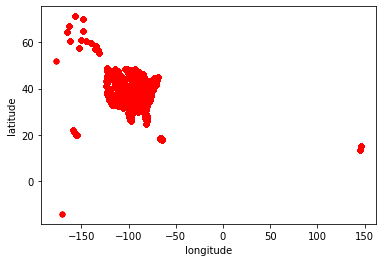

In [64]:
data_full.plot(kind='scatter', x='longitude',y='latitude',color='red')

In [65]:
data_full.columns

Index(['OP_UNIQUE_CARRIER', 'DEP_DELAY2', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'FLIGHTS', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'FL_DATEYear', 'FL_DATEMonth',
       'FL_DATEWeek', 'FL_DATEDay', 'FL_DATEDayofweek', 'FL_DATEDayofyear',
       'FL_DATEIs_month_end', 'FL_DATEIs_month_start', 'FL_DATEIs_quarter_end',
       'FL_DATEIs_quarter_start', 'FL_DATEIs_year_end', 'FL_DATEIs_year_start',
       'FL_DATEElapsed', 'Description', 'Unnamed: 0', 'formatted_address',
       'latitude', 'longitude', 'accuracy', 'google_place_id', 'type',
       'postcode', 'Address', 'number_of_results', 'status'],
      dtype='object')

In [66]:
#Add the total delays to get total delays at an airport
group_by_airport=data_full[["ORIGIN_AIRPORT_ID","OP_UNIQUE_CARRIER","DEP_DELAY2"]].\
                groupby(["ORIGIN_AIRPORT_ID","OP_UNIQUE_CARRIER"]).sum()
group_by_airport.head(10)

DEP_DELAY2
ORIGIN_AIRPORT_ID OP_UNIQUE_CARRIER            
10135             9E                      503.0
                  DL                      364.0
                  G4                     2239.0
                  MQ                      574.0
                  OH                     1274.0
                  OO                     1296.0
10136             MQ                     3029.0
10140             AA                     2641.0
                  AS                      156.0
                  B6                      236.0

In [67]:
## Count number of airlines per airport
ncar=group_by_airport.reset_index().groupby('ORIGIN_AIRPORT_ID')['OP_UNIQUE_CARRIER'].nunique() 
ncar.items()
#Get the name of airports with less than 5 airlines
d = dict((k, v) for k, v in ncar.items() if v < 5) 
# Put it here, This is a dictionary 
s=d.keys() 
print(s)

dict_keys([10136, 10141, 10146, 10155, 10157, 10158, 10165, 10170, 10185, 10208, 10268, 10299, 10333, 10372, 10409, 10466, 10469, 10551, 10558, 10561, 10562, 10577, 10581, 10627, 10631, 10666, 10676, 10728, 10731, 10732, 10739, 10747, 10754, 10779, 10918, 10926, 10967, 11013, 11027, 11049, 11067, 11076, 11092, 11097, 11111, 11122, 11150, 11203, 11233, 11252, 11259, 11274, 11308, 11337, 11413, 11415, 11447, 11468, 11471, 11503, 11525, 11537, 11577, 11587, 11603, 11617, 11630, 11641, 11648, 11695, 11778, 11823, 11865, 11867, 11898, 11905, 11921, 11980, 11982, 12003, 12007, 12012, 12016, 12119, 12124, 12129, 12156, 12177, 12223, 12244, 12255, 12265, 12280, 12335, 12343, 12391, 12397, 12402, 12441, 12511, 12519, 12523, 12544, 12819, 12888, 12891, 12898, 12899, 12902, 12915, 12917, 13029, 13061, 13076, 13121, 13127, 13139, 13184, 13232, 13241, 13264, 13290, 13344, 13360, 13377, 13388, 13433, 13459, 13476, 13795, 13829, 13832, 13873, 13933, 13964, 13970, 13983, 14004, 14006, 14025, 14082, 14

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558169 entries, 0 to 599917
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   OP_UNIQUE_CARRIER        558169 non-null  object 
 1   DEP_DELAY2               558169 non-null  float64
 2   ORIGIN_AIRPORT_ID        558169 non-null  int64  
 3   ORIGIN_AIRPORT_SEQ_ID    558169 non-null  int64  
 4   ORIGIN_CITY_MARKET_ID    558169 non-null  int64  
 5   ORIGIN                   558169 non-null  object 
 6   ORIGIN_CITY_NAME         558169 non-null  object 
 7   ORIGIN_STATE_ABR         558169 non-null  object 
 8   ORIGIN_STATE_FIPS        558169 non-null  int64  
 9   ORIGIN_STATE_NM          558169 non-null  object 
 10  DEST_AIRPORT_ID          558169 non-null  int64  
 11  CRS_DEP_TIME             558169 non-null  int64  
 12  DEP_TIME                 558169 non-null  float64
 13  DEP_DELAY                558169 non-null  float64
 14  ARR_

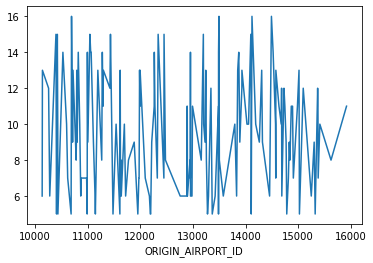

In [68]:
#Remove rows that are in the dictionary s
df_mod6=data_full[~data_full['ORIGIN_AIRPORT_ID'].isin(s)] 
#df[~df['title'].isin(to_drop)]
df_mod6.tail()
testdata=df_mod6.reset_index().groupby('ORIGIN_AIRPORT_ID')['OP_UNIQUE_CARRIER'].nunique()
#Plot to see if this make sense
testdata.plot(kind='line')
data1=df_mod6
data1.info()

<AxesSubplot:xlabel='OP_UNIQUE_CARRIER'>

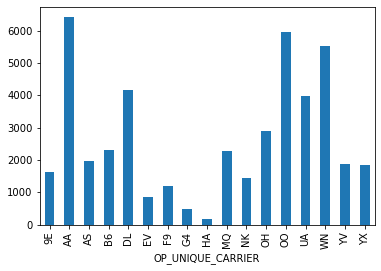

In [69]:
#How many flights that are delayed
group_by_delayed_fight=data1[data1.DEP_DELAY>30.0] # These flights have more than 30 delay
total_delay_per_Air=group_by_delayed_fight[["OP_UNIQUE_CARRIER","DEP_DELAY2"]].groupby('OP_UNIQUE_CARRIER').size()
total_delay_per_Air.plot(kind='bar') 

<AxesSubplot:xlabel='OP_UNIQUE_CARRIER'>

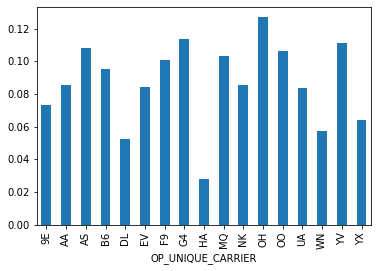

In [70]:
#Fraction of total flights per airline that are delayed
group_by_flight=data1[["OP_UNIQUE_CARRIER","DEP_DELAY2"]].groupby('OP_UNIQUE_CARRIER').size()
#print(group_by_flight)
# Get the fraction of delayed fligts
frac_delay_per_Air=total_delay_per_Air/group_by_flight
frac_delay_per_Air.plot(kind='bar')

<AxesSubplot:xlabel='OP_UNIQUE_CARRIER'>

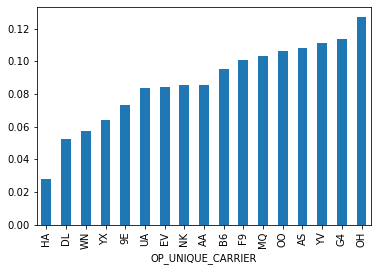

In [71]:
#Rank the delayed flights visually
s_frac=frac_delay_per_Air.sort_values(axis=0, ascending=True)
s_frac.plot(kind='bar') # This gives which airlines have most delays. 

In [72]:
group_by_airport=data1[["ORIGIN_AIRPORT_ID","OP_UNIQUE_CARRIER","DEP_DELAY"]].groupby(["ORIGIN_AIRPORT_ID","OP_UNIQUE_CARRIER"]).sum()
group_by_airport['DEP_DELAY']

ORIGIN_AIRPORT_ID  OP_UNIQUE_CARRIER
10135              9E                    298.0
                   DL                    266.0
                   G4                   1741.0
                   MQ                    460.0
                   OH                    864.0
                                         ...  
15919              MQ                    859.0
                   OH                     -4.0
                   OO                   1194.0
                   YV                    102.0
                   YX                    434.0
Name: DEP_DELAY, Length: 1458, dtype: float64

In [73]:
group_by_airport.head(14)

DEP_DELAY
ORIGIN_AIRPORT_ID OP_UNIQUE_CARRIER           
10135             9E                     298.0
                  DL                     266.0
                  G4                    1741.0
                  MQ                     460.0
                  OH                     864.0
                  OO                     912.0
10140             AA                    1687.0
                  AS                      34.0
                  B6                     109.0
                  DL                     -80.0
                  EV                    -266.0
                  F9                     -11.0
                  G4                     272.0
                  MQ                      20.0

In [74]:
group_by_airport.index.values

array([(10135, '9E'), (10135, 'DL'), (10135, 'G4'), ..., (15919, 'OO'), (15919, 'YV'), (15919, 'YX')],
      dtype=object)

In [75]:
group_by_airport3=group_by_airport.groupby(level=0).size().reset_index(name='Total_Airlines')
group_by_airport3

,ORIGIN_AIRPORT_ID,Total_Airlines
0,10135,6
1,10140,13
2,10257,12
3,10279,6
4,10397,15
...,...,...
147,15376,11
148,15380,7
149,15412,10
150,15624,8


In [76]:
group_by_airport4=data1[["ORIGIN_AIRPORT_ID","DEP_DELAY2"]].groupby(["ORIGIN_AIRPORT_ID"],as_index=False).sum()
group_by_airport4.head()

,ORIGIN_AIRPORT_ID,DEP_DELAY2
0,10135,6250.0
1,10140,12421.0
2,10257,7539.0
3,10279,2938.0
4,10397,211210.0


In [77]:
data_for_plot = pd.merge(group_by_airport4,group_by_airport3,how='left',on='ORIGIN_AIRPORT_ID')

In [78]:
data_for_plot.head()

,ORIGIN_AIRPORT_ID,DEP_DELAY2,Total_Airlines
0,10135,6250.0,6
1,10140,12421.0,13
2,10257,7539.0,12
3,10279,2938.0,6
4,10397,211210.0,15


In [79]:
#Merge the df_origin with data on ORIGIN_AIRPORT_ID
%time data_for_plot1=pd.merge(data_for_plot,positions, how ='left', on=['ORIGIN_AIRPORT_ID'])

CPU times: user 8.21 ms, sys: 2.01 ms, total: 10.2 ms
Wall time: 9.04 ms


In [80]:
data_for_plot1.head()

,ORIGIN_AIRPORT_ID,DEP_DELAY2,Total_Airlines,Unnamed: 0,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,Address,number_of_results,status
0,10135,6250.0,6,122,"Lehigh Valley International Airport (ABE), 331...",40.651646,-75.444096,ROOFTOP,ChIJ866awjQ_xIkRbKmwQiEHNgs,"airport,establishment,point_of_interest",18109.0,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",1,OK
1,10140,12421.0,13,29,"Albuquerque International Sunport (ABQ), 2200 ...",35.043333,-106.612909,ROOFTOP,ChIJD4986cMLIocRvC24j-l4RHM,"airport,establishment,point_of_interest",87106.0,"Albuquerque, NM: Albuquerque International Sun...",2,OK
2,10257,7539.0,12,30,"Albany International Center, Albany, NY 12204,...",42.672859,-73.739897,GEOMETRIC_CENTER,ChIJgTzb6WQJ3okRXnfnlv5exIo,"establishment,point_of_interest,transit_station",12204.0,"Albany, NY: Albany International",1,OK
3,10279,2938.0,6,31,Rick Husband Amarillo International Airport (A...,35.220324,-101.707451,ROOFTOP,ChIJO2aaBio2AYcRaNDxVloTp88,"airport,establishment,point_of_interest",79111.0,"Amarillo, TX: Rick Husband Amarillo International",1,OK
4,10397,211210.0,15,32,Hartsfield-Jackson Atlanta International Airpo...,33.640728,-84.427700,ROOFTOP,ChIJAVkD4S_99IgRSLCSGO-jF0E,"airport,establishment,point_of_interest",30320.0,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1,OK


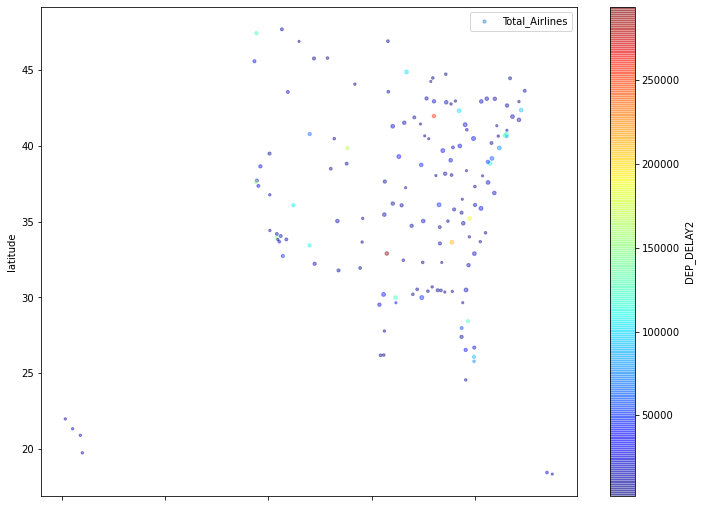

In [81]:
data_for_plot1.plot(kind='scatter', x='longitude',y='latitude',alpha =0.4,s=data_for_plot1["Total_Airlines"],\
              label = 'Total_Airlines',figsize=(12,9),c='DEP_DELAY2',cmap=plt.get_cmap("jet")\
              ,colorbar = True);
plt.legend();

In [82]:
data1.columns

Index(['OP_UNIQUE_CARRIER', 'DEP_DELAY2', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'FLIGHTS', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'FL_DATEYear', 'FL_DATEMonth',
       'FL_DATEWeek', 'FL_DATEDay', 'FL_DATEDayofweek', 'FL_DATEDayofyear',
       'FL_DATEIs_month_end', 'FL_DATEIs_month_start', 'FL_DATEIs_quarter_end',
       'FL_DATEIs_quarter_start', 'FL_DATEIs_year_end', 'FL_DATEIs_year_start',
       'FL_DATEElapsed', 'Description', 'Unnamed: 0', 'formatted_address',
       'latitude', 'longitude', 'accuracy', 'google_place_id', 'type',
       'postcode', 'Address', 'number_of_results', 'status'],
      dtype='object')

In [83]:
sd=data1[["ORIGIN_AIRPORT_ID","FLIGHTS"]].groupby(["ORIGIN_AIRPORT_ID"]).sum()
sd.head()

,FLIGHTS
ORIGIN_AIRPORT_ID,
10135,359.0
10140,1826.0
10257,897.0
10279,390.0
10397,32063.0


In [84]:
%time data_for_plot3=pd.merge(sd,data_for_plot,how ='left', on=['ORIGIN_AIRPORT_ID'])

CPU times: user 6.11 ms, sys: 1.79 ms, total: 7.9 ms
Wall time: 8.63 ms


In [85]:
data_for_plot3.head()

,ORIGIN_AIRPORT_ID,FLIGHTS,DEP_DELAY2,Total_Airlines
0,10135,359.0,6250.0,6
1,10140,1826.0,12421.0,13
2,10257,897.0,7539.0,12
3,10279,390.0,2938.0,6
4,10397,32063.0,211210.0,15


In [86]:
%time data_for_plot3=pd.merge(data_for_plot3,positions, how ='left', on=['ORIGIN_AIRPORT_ID'])

CPU times: user 9.34 ms, sys: 2.04 ms, total: 11.4 ms
Wall time: 10.6 ms


In [87]:
data_for_plot3.head(2)

,ORIGIN_AIRPORT_ID,FLIGHTS,DEP_DELAY2,Total_Airlines,Unnamed: 0,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,Address,number_of_results,status
0,10135,359.0,6250.0,6,122,"Lehigh Valley International Airport (ABE), 331...",40.651646,-75.444096,ROOFTOP,ChIJ866awjQ_xIkRbKmwQiEHNgs,"airport,establishment,point_of_interest",18109.0,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",1,OK
1,10140,1826.0,12421.0,13,29,"Albuquerque International Sunport (ABQ), 2200 ...",35.043333,-106.612909,ROOFTOP,ChIJD4986cMLIocRvC24j-l4RHM,"airport,establishment,point_of_interest",87106.0,"Albuquerque, NM: Albuquerque International Sun...",2,OK


In [88]:
#Total departure delay normalized by total number of flight
z=data_for_plot3['DEP_DELAY2'].values/data_for_plot3["FLIGHTS"]
dep_del_norm_tot_fl=z

In [89]:
total_flights=data_for_plot3["FLIGHTS"]
#size1 = size1/(size1.max()-size1.min())

In [90]:
import plotly.graph_objects as go

In [2]:
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = data_for_plot3['longitude'].values,
        lat = data_for_plot3['latitude'].values,
        text = data_for_plot3['formatted_address']+ '<br>' +'Total Flights '+ \
               data_for_plot3["FLIGHTS"].astype(str)+ '<br>' + '',
        mode = 'markers',
        marker_color = dep_del_norm_tot_fl,
        marker = dict(size = total_flights/1000,opacity = 1)
        ))
fig.update_layout(
        title = ' Jan, 2020 traffic US airports<br>(Hover for airport names)',
        geo_scope='usa'
    )
fig.show()

NameError: name 'go' is not defined

In [ ]:
dataf.head()

In [ ]:
ddelay=dataf[["ORIGIN_AIRPORT_ID","FLIGHTS"]].groupby(["ORIGIN_AIRPORT_ID"]).sum()
ddelay.head()

In [ ]:
ddelay1=dataf[dataf.DEP_DELAY2>0]
ddelay1.head()

In [ ]:
ddelay2=ddelay1[["ORIGIN_AIRPORT_ID","FLIGHTS"]].groupby(["ORIGIN_AIRPORT_ID"],as_index=False).sum()
ddelay2.head()

In [ ]:
ddelay2=ddelay2.rename(columns={"FLIGHTS":"Total_Delayed_flights"})

In [ ]:
ddelay2.head()

In [ ]:
%time data_for_plot4=pd.merge(data_for_plot3,ddelay2, how ='left', on=['ORIGIN_AIRPORT_ID'])
data_for_plot4.head()

In [ ]:
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = data_for_plot4['longitude'].values,
        lat = data_for_plot4['latitude'].values,
        text = data_for_plot4['formatted_address']+ '<br>' +'Total Flights '+ \
               data_for_plot4["FLIGHTS"].astype(str)+ '<br>' + \
               'Total delayed flights '+ data_for_plot4["Total_Delayed_flights"].astype(str)\
                +'<br>'+'Pecentage of delayed flights '+\
               (100*data_for_plot4["Total_Delayed_flights"]/data_for_plot4["FLIGHTS"]).round(2).astype(str),
        mode = 'markers',
        marker = dict(size = total_flights/50,opacity = 1, color = dep_del_norm_tot_fl, sizemode = 'area',
                     showscale=True),      
        ))
fig.update_layout(
        title = 'Jan, 2020 traffic US airports<br>(Hover for airport names)<br>Size of blobs prop.\
        total flights<br>colors prop. (total delay)/(total flight)',
        geo_scope='usa',
    )
fig.show()

In [ ]:
dataf.columns

In [ ]:
dataf.DISTANCE.hist(bins=20)

In [ ]:
dataf1 = dataf[['ORIGIN', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'DEP_TIME', 'DEP_DELAY', 'FLIGHTS', 'DISTANCE', 'OP_UNIQUE_CARRIER',
       'FL_DATEYear', 'FL_DATEMonth', 'FL_DATEWeek', 'FL_DATEDay',
       'FL_DATEDayofweek', 'FL_DATEDayofyear', 'FL_DATEIs_month_end',
       'FL_DATEIs_month_start', 'FL_DATEIs_quarter_end',
       'FL_DATEIs_quarter_start', 'FL_DATEIs_year_end', 'FL_DATEIs_year_start',
       'FL_DATEElapsed']]

In [ ]:
train_cats(dataf1)

In [6]:
??proc_df

In [ ]:
dataf1.info()

In [ ]:
df, y, nas = proc_df(dataf1, 'DEP_DELAY')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
dftest = df[:400000]
ytest=y[:400000]

In [ ]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 120  # 
n_trn = len(dftest)-n_valid
raw_train, raw_valid = split_vals(dftest, n_trn)
X_train, X_valid = split_vals(dftest, n_trn)
y_train, y_valid = split_vals(ytest, n_trn)

X_train.shape, y_train.shape, X_valid.shape

In [ ]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn.model_selection import cross_val_score

from sklearn import metrics
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=10, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

In [ ]:
#Run 5 fold cross validation
#scores = cross_val_score(m, X_train, y_train, cv=2) # k=5
#print(scores.mean())

In [ ]:
ntrees = 100
minleaf = 1
for maxf in np.arange(0.1,0.6,0.1):
    print(f"n_estimators={ntrees}, max_features={maxf:.1f}, min_samples_leaf={minleaf}")
    m = RandomForestRegressor(n_estimators=ntrees, min_samples_leaf=minleaf, max_features=maxf, n_jobs=-1,\
                              oob_score=True)
    %time m.fit(X_train, y_train)
    print_score(m)
    print('----------')

In [ ]:
# choose max_feature = 0.2
ntrees = 100
#minleaf = 1
maxf = 0.2
for minleaf in range(1,7):
    print(f"n_estimators={ntrees}, max_features={maxf:.1f}, min_samples_leaf={minleaf}")
    m = RandomForestRegressor(n_estimators=ntrees, min_samples_leaf=minleaf, max_features=0.2, n_jobs=-1,\
                              oob_score=True)
    %time m.fit(X_train, y_train)
    print_score(m)
    print('----------')

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
m = RandomForestRegressor(n_estimators=ntrees, min_samples_leaf=3, max_features=0.2, n_jobs=-1,\
                              oob_score=True)
clf=m.fit(X_train, y_train)

In [ ]:
result = permutation_importance(m, X_valid, y_valid, n_repeats=10,random_state=0)

In [ ]:
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

In [ ]:
perm_sorted_idx 

In [ ]:
min_samples_leaf = 3
ntrees = 100
max_features=0.2


def test_valid(X, y, X_valid, y_valid, n_estimators=ntrees,
               max_features=max_features, min_samples_leaf=min_samples_leaf):
    X_valid = X_valid.reindex(columns=X.columns)
    rf = RandomForestRegressor(n_estimators=ntrees,
                               n_jobs=-1,
                               oob_score=True,
                               max_features=max_features, 
                               min_samples_leaf=min_samples_leaf)
    rf.fit(X, y)
    #n = rfnnodes(rf)
    #h = np.median(rfmaxdepths(rf))
    n=10
    h=10
    y_pred = rf.predict(X_valid)
    mae_valid = mean_absolute_error(y_valid, y_pred)
    mae_valid_pc = mae_valid*100/y_valid.mean()
    rmsle_valid = np.sqrt(mean_squared_error(y_valid, y_pred) )
    r2_score_valid = rf.score(X_valid, y_valid)
    print(f"OOB R^2 {rf.oob_score_:.5f} using {n:,d} tree nodes {h} median tree height")
    print(f"Validation R^2 {r2_score_valid:.5f}, RMSE {rmsle_valid:.5f}, MAE {mae_valid:.0f},\
    MAE_pc {mae_valid_pc:.0f}")
    return rf, r2_score_valid, rmsle_valid, mae_valid

In [ ]:
rf, r2_score_2007, rmsle_2007, mae_2007 = test_valid(X_train, y_train,X_valid, y_valid)

In [ ]:
reg = LinearRegression()
%time reg.fit(X_train,y_train)
#y_pred = reg.predict(X_test)
print_score(reg)

#### Comparison to Linear Regression.
We are getting better performance using Random Forest than a simple linear regression. 


In [ ]:
#Sum up number of nodes accross all trees
ntrees = rf.n_estimators
nnodes = sum([rf.estimators_[i].tree_.node_count for i in range(ntrees)])
print(f"{nnodes:,}") # print with commas